# 6 Minute Dataset, 4 cameras - August 

In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
import pandas as pd
import numpy as np
import bib.preprocessing as prep
from pandas import DataFrame, Series
from bb_binary import Repository, convert_frame_to_numpy, load_frame_container
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
folder = "../data/1h/2015082215/"

In [68]:
fc0 = prep.get_fc(folder,0) # for cam 0
fc1 = prep.get_fc(folder,1) # for cam 1
fc2 = prep.get_fc(folder,2) # for cam 2
fc3 = prep.get_fc(folder,3) # for cam 3

## Attributes of Frame Container - corresponds to a video file (1024 frames)
Wrapping frames and detections of one video file. For each camera there is a seperate file.

* `fc.id` 
* `fc.dataSources`
* `fc.fromTimestamp`
* `fc.toTimestamp`
* `fc.camId`
* `fc.hiveId`
* `fc.transformationMatrix`
* `fc.frames`

## Frames

In [69]:
len(fc0.frames)

1024

In [70]:
frame = fc0.frames[100]

* `frame.id`
* `frame.frameIdx` (0-1023)
* `frame.dataSourceIdx`- Ist irgenwie immer null, weil es nur genau eine DataSource gibt, ist das mal anders irgendwann?
* `frame.dataSourceIdx`
* `frame.timestamp`
* `frame.timedelta` - Ist auch immer 0. Warum?
* `frame.detectionsUnion`

## Detections Union - DetectionsDP (hier sind alle Detections drin)

In [71]:
detections = [det for det in frame.detectionsUnion.detectionsDP]

In [72]:
detection = detections[5]

In [73]:
detection

<bb_binary_schema.capnp:DetectionDP reader (idx = 5, xpos = 150, ypos = 1737, xposHive = 150, yposHive = 1737, zRotation = 0.84273362, yRotation = -0.16114587, xRotation = 0.1610682, radius = 22.572151, localizerSaliency = 0.70354193, decodedId = [1, 255, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0], descriptor = [156, 56, 112, 224, 192, 129, 3, 6, 12, 25, 50, 100, 201, 146, 37, 74])>

## Create a DataFrame

In [91]:
df0 = prep.get_dataframe2(fc0)
df1 = prep.get_dataframe2(fc1)
df2 = prep.get_dataframe2(fc2)
df3 = prep.get_dataframe2(fc3)

In [75]:
df0.head(3)

,idx,xpos,ypos,radius,zRotation,decodedId,frame_idx,timestamp,cam_id,fc_id
0,0,51,300,22.956493,-0.110975,"[0, 0, 255, 129, 0, 0, 253, 255, 255, 255, 255...",0,1.440256e+09,0,12852176111040490474
1,1,50,2813,22.676100,0.897735,"[238, 4, 129, 0, 4, 2, 0, 0, 0, 255, 255, 255]",0,1.440256e+09,0,12852176111040490474
2,2,75,1925,23.020720,-2.575810,"[1, 255, 0, 255, 0, 255, 0, 252, 20, 251, 255, 6]",0,1.440256e+09,0,12852176111040490474


In [76]:
df0.shape

(224057, 10)

In [77]:
df0.xpos.describe()

count    224057.000000
mean       1223.821220
std         733.759398
min          47.000000
25%         600.000000
50%        1164.000000
75%        1788.000000
max        2953.000000
Name: xpos, dtype: float64

In [78]:
df0.ypos.describe()

count    224057.000000
mean       1953.197660
std         896.709785
min          50.000000
25%        1237.000000
50%        1938.000000
75%        2624.000000
max        3926.000000
Name: ypos, dtype: float64

In [79]:
df0.radius.describe()

count    224057.000000
mean         22.857300
std           0.201128
min          22.413666
25%          22.712479
50%          22.825811
75%          22.968830
max          23.858681
Name: radius, dtype: float64

In [80]:
df0.zRotation.describe()

count    224057.000000
mean         -0.031968
std           1.686215
min          -3.141547
25%          -1.200244
50%          -0.057948
75%           1.058424
max           3.141585
Name: zRotation, dtype: float64

## Plotting XY Position for all Detections

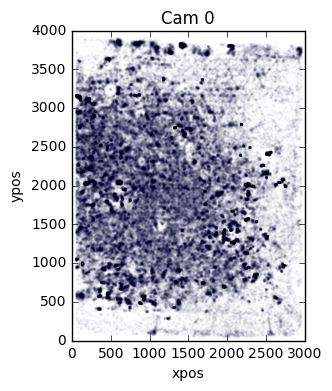

In [81]:
df0.plot.scatter(x='xpos', y='ypos', title="Cam 0", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.02)
plt.axes().set_aspect('equal')

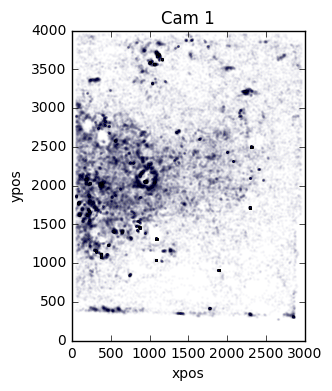

In [82]:
df1.plot.scatter(x='xpos', y='ypos', title="Cam 1", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.02)
plt.axes().set_aspect('equal')

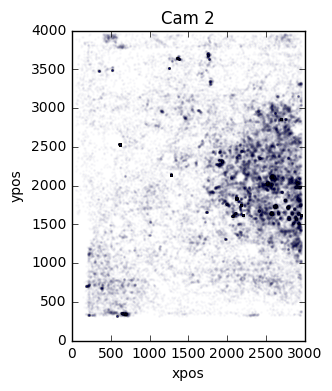

In [83]:
df2.plot.scatter(x='xpos', y='ypos', title="Cam 2", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.02)
plt.axes().set_aspect('equal')

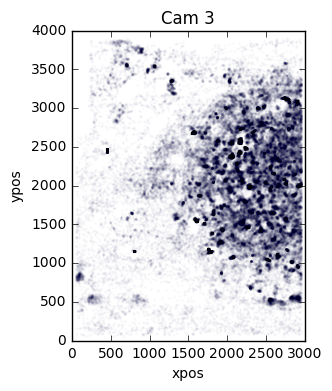

In [84]:
df3.plot.scatter(x='xpos', y='ypos', title="Cam 3", s=1,xlim=(0,3000),ylim=(0,4000), alpha=0.02)
plt.axes().set_aspect('equal')

## IDs with good quality

In [92]:
df0id = prep.calcIds(df0, 0.95)
df1id = prep.calcIds(df1, 0.95)
df2id = prep.calcIds(df2, 0.95)
df3id = prep.calcIds(df3, 0.95)

In [107]:
list_dfid = [df0id, df1id, df2id, df3id]
list_df = [df0, df1, df2, df3]

In [129]:
data = list(zip([l.shape[0] for l in list_dfid], [l.shape[0] for l in list_df]))

In [130]:
data

[(135559, 224057), (56682, 89801), (46403, 68462), (81285, 122527)]

In [151]:
df_ids = DataFrame(data, columns=['count_ids', 'count_det'])

In [152]:
df_ids['percent'] = df_ids.count_ids*100/df_ids.count_det

In [153]:
df_ids.percent = df_ids.percent.apply(lambda x: "{:.2f}%".format(np.round(x, decimals=2)))

In [154]:
df_ids

,count_ids,count_det,percent
0,135559,224057,60.50%
1,56682,89801,63.12%
2,46403,68462,67.78%
3,81285,122527,66.34%
